In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('data/apple.csv')
colume_drop = data.iloc[:, -2:]
data = data.drop(colume_drop, axis=1)
data['Date'] = pd.to_datetime(data['Date'], utc=True)
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.head())
print(type(data.index[0]))

                 Open       High        Low      Close     Volume
Date                                                             
2019-01-02  37.118910  38.067913  36.960742  37.845039  148158800
2019-01-03  34.504368  34.921355  34.029868  34.075401  365248800
2019-01-04  34.636170  35.599552  34.461229  35.530052  234428400
2019-01-07  35.635491  35.666646  34.964479  35.450962  219111200
2019-01-08  35.841593  36.383198  35.592362  36.126774  164101200
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# 数据预处理

In [33]:
for column in data.columns:
    if data[column].isnull().sum() > 0:
        print(column)
    else:
        print(column, '无缺失值')
        
        

# 数据归一化

scaler = MinMaxScaler(feature_range=(-1, 1))
close_data = data['Close'].values.reshape(-1, 1)
# print(close_data[:5])

prices_scaled  = scaler.fit_transform(close_data)


# 划分训练集和测试集
train_size = int(len(prices_scaled) * 0.7)
test_size = len(prices_scaled) - train_size
train_data, test_data = prices_scaled[0:train_size], prices_scaled[train_size:len(prices_scaled)]

# 构建数据集
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 转换数据维度
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))




Open 无缺失值
High 无缺失值
Low 无缺失值
Close 无缺失值
Volume 无缺失值


In [34]:
## 构建LSTM模型
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())



/root/miniconda3/envs/datascience/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1283
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0051
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0038
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0034
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0033
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0033
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0030
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0030
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0029
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0026
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0028
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0024
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0023
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0024
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0022
E

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


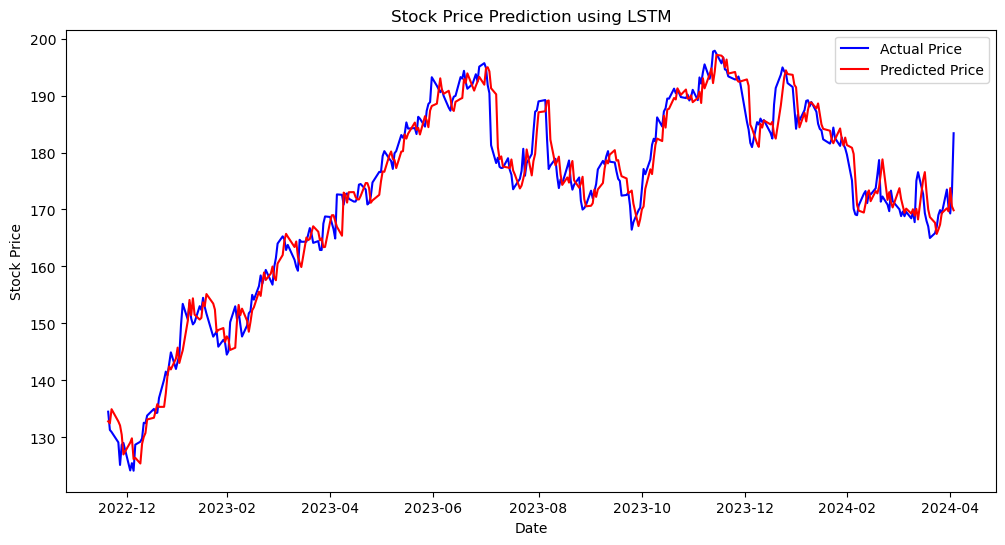

In [36]:
# 预测股票价格
import matplotlib.pyplot as plt
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

test_data = scaler.inverse_transform(test_data)
# 可视化预测结果
fig = plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + time_step + 1:], test_data[time_step + 1:], color='blue', label='Actual Price')
plt.plot(data.index[train_size + time_step + 1:], predicted_prices, color='red', label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

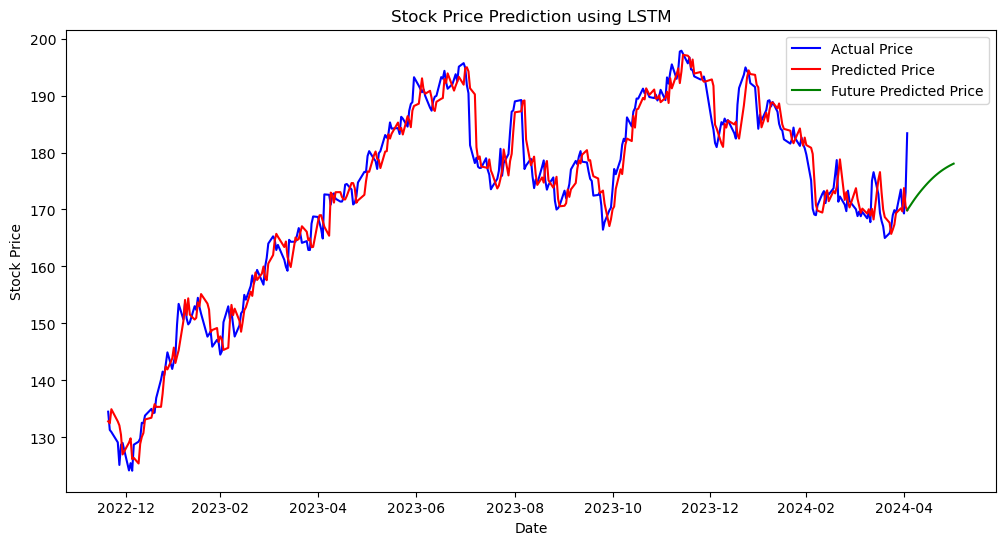

In [38]:
# 假设 time_step 已定义
# 假设 scaler 和 model 是你已经训练好的 MinMaxScaler 和 LSTM 模型

# 获取最后 time_step 天的数据作为输入
last_sequence = X_test[-1:]
current_sequence = last_sequence
# print(current_sequence)

# 存储模型预测的未来一周的价格
future_prices = []

# 连续预测未来一周
for _ in range(30):  # 未来7天
    next_day_price = model.predict(current_sequence)
    future_prices.append(next_day_price[0, 0])  # 存储预测结果
    # 更新输入数据用于下一次预测
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1, 0] = next_day_price[0, 0]

# 反归一化预测结果
future_prices = np.array(future_prices).reshape(-1, 1)
future_prices = scaler.inverse_transform(future_prices)

# 计算未来日期
last_date = data.index[-1]  # 假设数据集中有日期索引
future_dates = pd.date_range(start=last_date, periods=30)  # 生成未来7天的日期

# 可视化结果
fig = plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + time_step + 1:], test_data[time_step + 1:], color='blue', label='Actual Price')
plt.plot(data.index[train_size + time_step + 1:], predicted_prices, color='red', label='Predicted Price')
plt.plot(future_dates, future_prices, color='green', label='Future Predicted Price')  # 未来一周的预测
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
